Chamber Creation 

Noise Creation 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


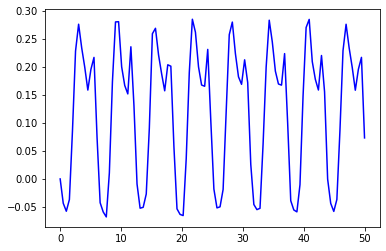

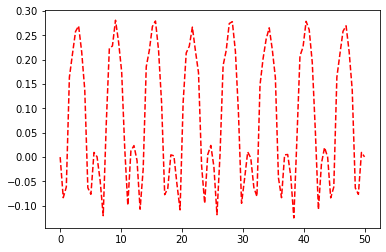

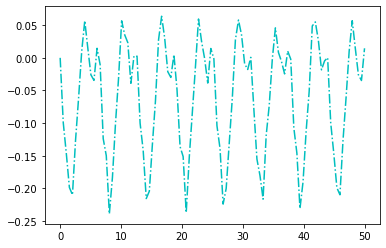

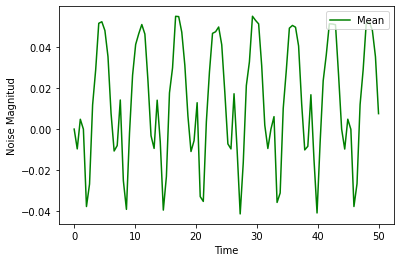

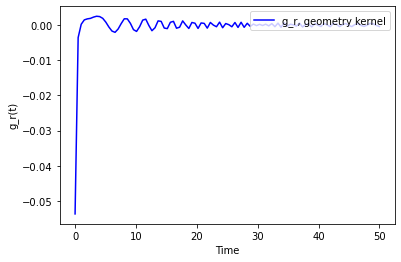

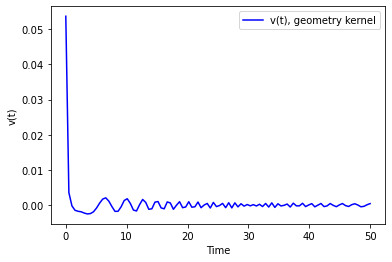

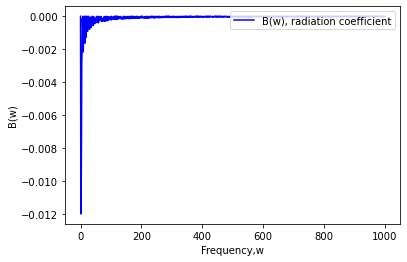

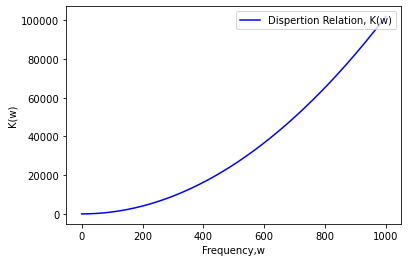

Pressure 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


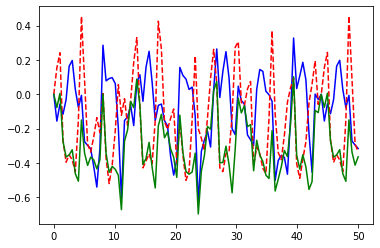

No handles with labels found to put in legend.


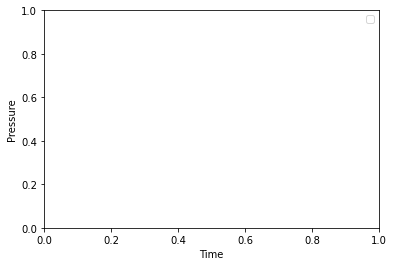

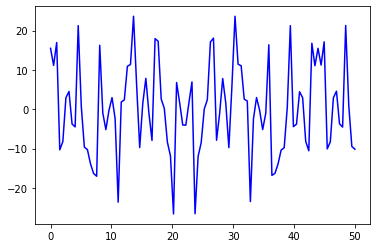

No handles with labels found to put in legend.


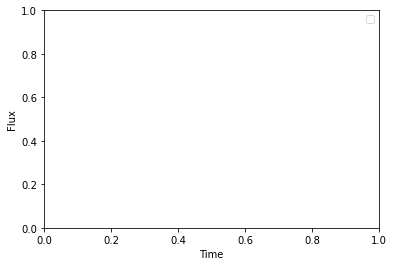

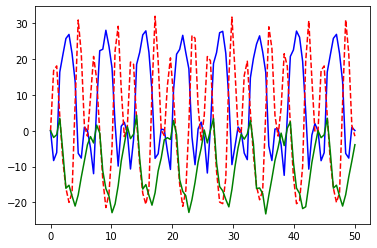

No handles with labels found to put in legend.


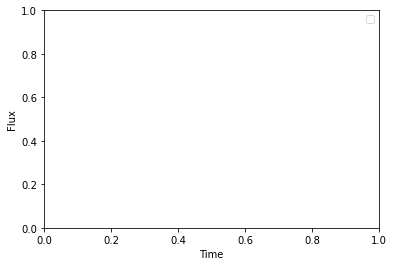

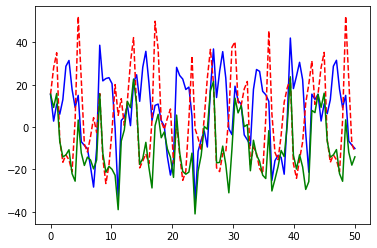

No handles with labels found to put in legend.


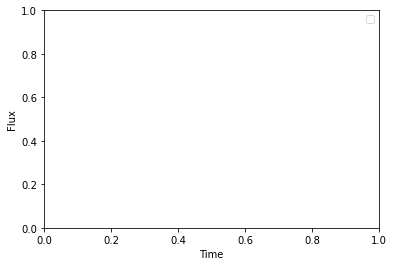

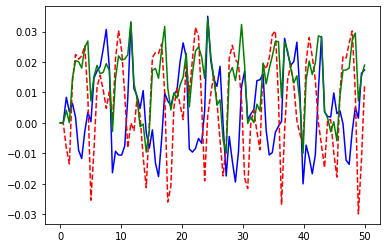

No handles with labels found to put in legend.


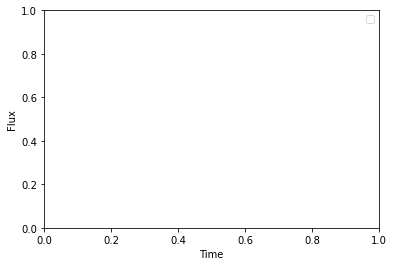

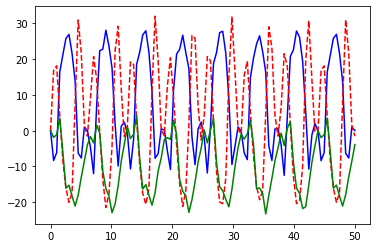

No handles with labels found to put in legend.


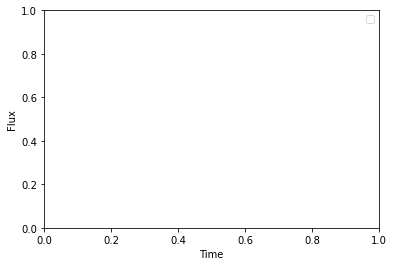

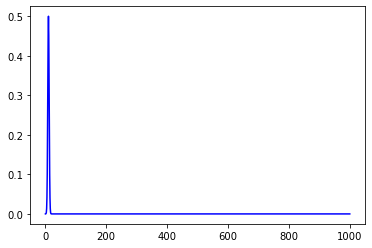

No handles with labels found to put in legend.


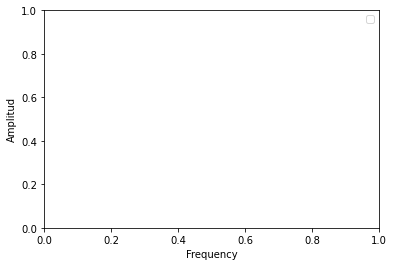

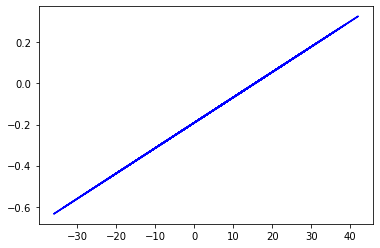

In [2]:
import numpy as np
import matplotlib.pylab as plt
from ChamberFalcao import ChamberFalcao 
from scipy import signal
from scipy import fftpack
from scipy.interpolate import interp1d

######################
#Chamber  Creation
######################

print("Chamber Creation \n")

v0=1050.0;
h=8.0
b=12.0
a=12.0
Nt=100
t=50.0
dt=t/Nt
Nnu=100000
nu=1000.0
dnu=nu/Nnu
g=9.8
rw=1025

Wells=99.4
eps=1.0
multiplier=100.0
# 10.000.000 es el orden de memoria que soporta mi pc
if(nu/dnu<0.8*10000000):
    camara=ChamberFalcao(v0,h,b,a,rw,g,t,dt,nu,dnu,eps)
else:
    camara=ChamberFalcao(v0,h,b,a,rw,g,t,dt,nu,dnu,eps,False)

######################
# Noise Creation
######################

print("Noise Creation \n")
T=np.linspace(0,t,Nt)
Om=np.linspace(0,nu,Nnu)
INTERPGR=interp1d(T,camara.AproximateGeometryKernel(T,Om))

Nom=1000
Nt=100
T=np.linspace(0,t,Nt)
Om=np.linspace(0,nu,Nom)
GR=INTERPGR(T)
BW=camara.AproximatedRadiationCoefficient(Om)

Dt=T[1]-T[0]
Dom=Om[1]-Om[0]
NNN=4
fdkh=np.sqrt(Dom)*np.sqrt(-BW)/(Om+1e-9)
Samples=2**NNN
DoCov=NNN>10
SGv=np.zeros([Samples,Nt])

if (Nt*Nom<10000001):
    outTOm=np.outer(T,Om)
    Ctom=(1-np.cos(outTOm))
    Stom=np.sin(outTOm)
    
    fCt=fdkh*Ctom
    fSt=fdkh*Stom
    
    
    for ss in range(Samples):
        dWW=np.random.normal(0,1,Nom*2)
        print(ss)
        for i in range(Nt):
            aux=np.concatenate([fCt[i],fSt[i]])
            SGv[ss,i]=np.dot(dWW,aux)

else: print("Nt*Nom>10000000, Disminuir dimensiones")
    
GvMean=np.mean(SGv,0)

figSGv=plt.figure()
plt.plot(T,SGv[0],'b-',label="Trajectory 1")
plt.show()
plt.plot(T,SGv[1],'r--',label="Trajectory 2")
plt.show()
plt.plot(T,SGv[2],'c-.',label="Trajectory 3")
plt.show()
plt.plot(T,GvMean,'g-',label="Mean")
plt.legend(loc="upper right")
plt.xlabel("Time")
plt.ylabel("Noise Magnitud")
plt.show()

figGR=plt.figure()
plt.plot(T,GR,'b-',label="g_r, geometry kernel")
plt.legend(loc="upper right")
plt.xlabel("Time")
plt.ylabel("g_r(t)")
plt.show()

figVT=plt.figure()
plt.plot(T,-GR,'b-',label="v(t), geometry kernel")
plt.legend(loc="upper right")
plt.xlabel("Time")
plt.ylabel("v(t)")
plt.show()
#figVT.savefig("Sim-VT.png")

figBW=plt.figure()
plt.plot(Om,BW,'b-',label="B(w), radiation coefficient")
plt.legend(loc="upper right")
plt.xlabel("Frequency,w")
plt.ylabel("B(w)")
plt.show()

figKDR=plt.figure()
plt.plot(Om,camara.DispertionRelation(Om),'b-',label="Dispertion Relation, K(w)")
plt.legend(loc="upper right")
plt.xlabel("Frequency,w")
plt.ylabel("K(w)")
plt.show()

######################
# Covariance
######################
if DoCov:
    print("Covariance \n")
    
    SCov=np.zeros(Nt)
    TCov=np.zeros(Nt)
    
    aux1=SGv[:,1]-GvMean[1]
    aux2=1-np.cos(T[1]*Om)
    aux3=np.sin(T[1]*Om)
    auxf=np.sqrt(-BW)
    for i in range(Nt):    
        SCov[i]=np.dot(SGv[:,i]-GvMean[i],aux1)/(Samples-1)
        TCov[i]=sum(Dom*auxf*auxf/((Om+1e-9)*(Om+1e-9))*((1-np.cos(T[i]*Om))*aux2+np.sin(T[i]*Om)*aux3))
    
    
    figCov=plt.figure()
    plt.plot(T,SCov,'gx',label='Samples Covariance')
    plt.plot(T,TCov,'b-',label='Theoretical Covariance')
    plt.legend(loc='upper right')
    plt.xlabel('Time, sec')
    plt.ylabel('Covariance between 0 and t')
    plt.show()

#np.savez("Test1",v0=v0,h=h,b=b,a=a,Nt=Nt,t=t,Nnu=Nnu,nu=nu,g=g,rw=rw,Nom=Nom,GR=GR,BW=BW,GvMean=GvMean,SGv=SGv,SCov=SCov,TCov=TCov)
       
#npzfile=np.load("Test1.npz")
#v0=npzfile['v0']
#h=npzfile['h']
#b=npzfile['b']
#a=npzfile['a']
#Nt=npzfile['Nt']
#t=npzfile['t']
#Nnu=npzfile['Nnu']
#nu=npzfile['nu']
#g=npzfile['g']
#rw=npzfile['rw']
#Nom=npzfile['Nom']
#GR=npzfile['GR']
#BW=npzfile['BW']
#GvMean=npzfile['GvMean']
#SGv=npzfile['SGv']
#SCov=npzfile['SCov']
#TCov=npzfile['TCov']
#T=np.linspace(0,t,Nt)
#Om=np.linspace(0,nu,Nom)

######################
#Pressure Calc
# i will suppose W(P)=Constant*(P)
#Incident Wave
# i will suppose Q_i(t)=2b\sum_{n=1}^{N}\frac{A_n \omega_n}{k_n} \sin(2 k_n a)\cos(\omega_n t + \theta_n)
######################

print("Pressure \n")

pa=101325
gamma=1.4
Rho_a=1.225
Alpha1=gamma*pa/v0
Dt=T[1]-T[0]


KDR=camara.DispertionRelation(Om)
An=np.exp(-(Om-10)*(Om-10)*0.1)/2


PSamples=2**NNN
P=np.zeros([PSamples,Nt])
Work=np.zeros([PSamples])
Q_i=np.zeros([Nt])
Conv=np.zeros([PSamples,Nt])
Q_r=np.zeros([PSamples,Nt])


FFTGR=fftpack.rfft(GR)
for tt in range(int(Nt)):
    print(tt)
    if tt==0:
        P[:,0]=0
        Q_i[0]=2*b*sum(An*Om/KDR*np.sin(2*KDR*a))
    else:
        Q_i[tt]=2*b*sum(An*Om/KDR*np.sin(2*KDR*a)*np.cos(Om*T[tt]))
        for pp in range(PSamples):    
            Conv[pp,tt]=np.convolve(P[pp,:max(tt,1)],GR[:max(tt,1)],mode='valid')   
        Q_r[:,tt]= Conv[:,tt]+multiplier*(SGv[0:PSamples,tt])
        P[:,tt]=(P[:,tt-1]+Alpha1*(Q_i[tt]-Q_i[0]+Q_r[:,tt]-Q_r[:,0])*Dt)/(1+Alpha1/Rho_a*Wells*Dt)
        Work=Work+P[:,tt]*(Q_i[tt]+Q_r[:,tt])
Work=Work*Dt/T[-1]
PMean=np.zeros([NNN,Nt])
for ii in range(NNN):
    PMean[ii]=np.mean(P[0:2**ii],0)

Tinicial=0
Tfinal=Nt

figSP=plt.figure()
plt.plot(T[Tinicial:Tfinal],P[1,Tinicial:Tfinal],'b-',label="Pressure 1")
plt.plot(T[Tinicial:Tfinal],P[9,Tinicial:Tfinal],'r--',label="Pressure 2")
plt.plot(T[Tinicial:Tfinal],P[3,Tinicial:Tfinal],'g-',label="Pressure 3")
plt.show()
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Pressure")
plt.show()
#figSP.savefig("Sim-Pressure2.png")

if DoCov:
    figPMean=plt.figure()
    plt.plot(T[Tinicial:Tfinal],PMean[NNN-1],'b-',label="Pressure Mean 2^14")
    plt.plot(T[Tinicial:Tfinal],PMean[NNN-2],'r--',label="Pressure Mean 2^13")
    plt.plot(T[Tinicial:Tfinal],PMean[NNN-3],'g-',label="Pressure Mean 2^12")
    plt.show()
    plt.legend(loc='upper right')
    plt.xlabel("Time")
    plt.ylabel("Pressure Mean")
    plt.show()
    #figPMean.savefig("Sim-PresMean.png")

figQ_i=plt.figure()
plt.plot(T[Tinicial:Tfinal],Q_i[Tinicial:Tfinal],'b-',label="Incident Wave Flux")
plt.show()
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Flux")
plt.show()
#figQ_i.savefig("Sim-InciWave.png")

figQ_r=plt.figure()
plt.plot(T[Tinicial:Tfinal],Q_r[1,Tinicial:Tfinal],'b-',label="Radiation Wave Flux 1")
plt.plot(T[Tinicial:Tfinal],Q_r[9,Tinicial:Tfinal],'r--',label="Radiation Wave Flux 2")
plt.plot(T[Tinicial:Tfinal],Q_r[3,Tinicial:Tfinal],'g-',label="Radiation Wave Flux 3")
plt.show()
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Flux")
plt.show()
#figQ_r.savefig("Sim-RadiWave2.png")


figQ_tot=plt.figure()
plt.plot(T[Tinicial:Tfinal],Q_r[1,Tinicial:Tfinal]+Q_i[Tinicial:Tfinal],'b-',label="Total Water Flux 1")
plt.plot(T[Tinicial:Tfinal],Q_r[9,Tinicial:Tfinal]+Q_i[Tinicial:Tfinal],'r--',label="Total Water Flux 2")
plt.plot(T[Tinicial:Tfinal],Q_r[3,Tinicial:Tfinal]+Q_i[Tinicial:Tfinal],'g-',label="Total Water Flux 3")
plt.show()
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Flux")
plt.show()
#figQ_tot.savefig("Sim-TotWave2.png")


figConv=plt.figure()
plt.plot(T[Tinicial:Tfinal],Conv[1,Tinicial:Tfinal],'b-',label="Convolution Wave Flux 1")
plt.plot(T[Tinicial:Tfinal],Conv[9,Tinicial:Tfinal],'r--',label="Convolution Wave Flux 2")
plt.plot(T[Tinicial:Tfinal],Conv[3,Tinicial:Tfinal],'g-',label="Convolution Wave Flux 3")
plt.show()
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Flux")
plt.show()
#figConv.savefig("Sim-ConvWave2.png")


figNoise=plt.figure()
plt.plot(T[Tinicial:Tfinal],multiplier*SGv[1,Tinicial:Tfinal],'b-',label="Noise Wave Flux 1")
plt.plot(T[Tinicial:Tfinal],multiplier*SGv[9,Tinicial:Tfinal],'r--',label="Noise Wave Flux 2")
plt.plot(T[Tinicial:Tfinal],multiplier*SGv[3,Tinicial:Tfinal],'g-',label="Noise Wave Flux 3")
plt.show()
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Flux")
plt.show()
#figNoise.savefig("Sim-NoiseWave2.png")


figAmpli=plt.figure()
plt.plot(Om,An,'b-',label="Incoming Wave Amplitud")
plt.show()
plt.legend(loc='upper right')
plt.xlabel("Frequency")
plt.ylabel("Amplitud")
plt.show()
#figAmpli.savefig("Sim-Amplitud.png")

figQP=plt.figure()
plt.plot(Q_r[1,Tinicial:Tfinal]+Q_i[Tinicial:Tfinal],P[1,Tinicial:Tfinal],'b-',label="")
plt.show()

In [8]:
import os 
cwd = os.getcwd()
cwd

'd:\\Desarrollo\\Repositorios\\owc_simulation'